In [2]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt

In [3]:
# Create database file at folder "my_vectordb" or load into client if exists.
chroma_client = chromadb.PersistentClient(path="my_vectordb")

# Instantiate image loader helper.
image_loader = ImageLoader()

# Instantiate multimodal embedding function.
multimodal_ef = OpenCLIPEmbeddingFunction()

# Create the collection, aka vector database. Or, if database already exist, then use it. Specify the model that we want to use to do the embedding.
multimodal_db = chroma_client.get_or_create_collection(name="multimodal_db", embedding_function=multimodal_ef, data_loader=image_loader)

In [11]:
# Use .add() to add a new record or .update() to update existing record
multimodal_db.add(
    ids=['0','1','2','3'], 
    uris=['images/formal_pants_black.jpeg', 'images/formal_pants_navyblue.jpeg', 'images/hawaii_shirt_blue_floral.jpeg', 'images/hawaii_shirt_red_floral.jpeg'],
    # metadatas=[{'img_category':'clothes'}, {'img_category':'clothes'}, {'img_category':'clothes'}, {'img_category':'clothes'}]
)

In [5]:
# Check record count
multimodal_db.count()

4

In [6]:
# Simple function to print the results of a query.
# The 'results' is a dict {ids, distances, data, ...}
# Each item in the dict is a 2d list.
def print_query_results(query_list: list, query_results: dict)->None:
    result_count = len(query_results['ids'][0])

    for i in range(len(query_list)):
        print(f'Results for query: {query_list[i]}')

        for j in range(result_count):
            id       = query_results["ids"][i][j]
            distance = query_results['distances'][i][j]
            data     = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri      = query_results['uris'][i][j]

            print(f'id: {id}, distance: {distance}, metadata: {metadata}, document: {document}') 

            # Display image, the physical file must exist at URI.
            # (ImageLoader loads the image from file)
            print(f'data: {uri}')
            plt.imshow(data)
            plt.axis("off")
            plt.show()

Results for query: tshirt
id: 2, distance: 1.5826044595562163, metadata: {'img_category': 'clothes'}, document: None
data: images/hawaii_shirt_blue_floral.jpeg


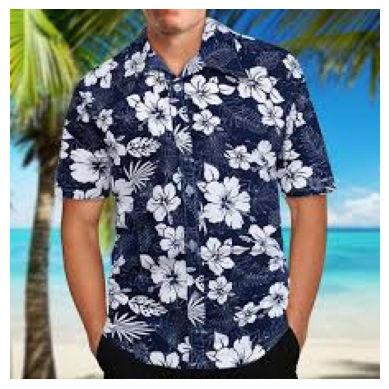

id: 3, distance: 1.5837430169531286, metadata: {'img_category': 'clothes'}, document: None
data: images/hawaii_shirt_red_floral.jpeg


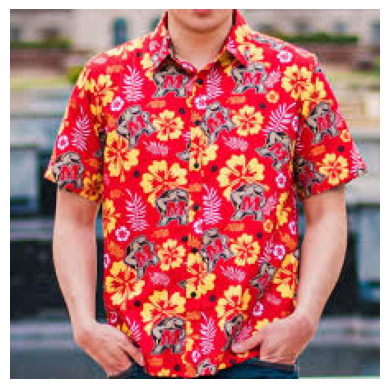

id: 0, distance: 1.6905174178452504, metadata: {'img_category': 'clothes'}, document: None
data: images/formal_pants_black.jpeg


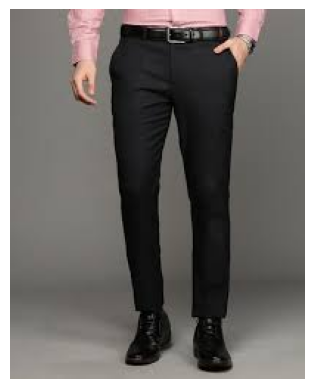

In [7]:
# It is possible to submit multiple queries at the same time, just add to the list.  
query_texts = ['tshirt']

# Query vector db
query_results = multimodal_db.query(
    query_texts = query_texts,
    n_results=3,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'img_category':'clothes'}
)

print_query_results(query_texts, query_results)

In [8]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [9]:
import cv2
import glob

imdir = '/test_images'
ext = ['png', 'jpg', 'gif']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]